<a href="https://colab.research.google.com/github/melyukari/trabalho-calculo/blob/main/Regress%C3%A3o_Log%C3%ADstica_trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [43]:
# carregar o dataset
df = pd.read_csv('personality_dataset.csv')

In [44]:
# renomear colunas e valores para o português
df = df.rename(columns={'Going_outside': 'Frequência_de_sair_de_casa', 'Personality': 'Personalidade'})
df['Personalidade'] = df['Personalidade'].map({'Introvert': 'Introvertido', 'Extrovert': 'Extrovertido'})

In [45]:
# criar variável binária: Introvertido = 0 e Extrovertido = 1
df['Personalidade_binária'] = df['Personalidade'].map({'Introvertido': 0, 'Extrovertido': 1})

In [46]:
# remover valores ausentes
df_clean = df[['Frequência_de_sair_de_casa', 'Personalidade_binária']].dropna()

In [47]:
# definir X e y
x =  df_clean[['Frequência_de_sair_de_casa']]
y = df_clean['Personalidade_binária']

In [48]:
# dividir os dados em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=42)

In [49]:
# treinar o modelo
modelo = LogisticRegression()
modelo.fit(x_treino, y_treino)

LogisticRegression()

In [50]:
# prever com dados de teste
y_previsto = modelo.predict(x_teste)

In [51]:
# avaliar o modelo
matriz_confusão = confusion_matrix(y_teste, y_previsto)
print(matriz_confusão)
relatorio = classification_report(y_teste,y_previsto, target_names=['Introvertido', 'Extrovertido'])

[[249  19]
 [ 23 276]]


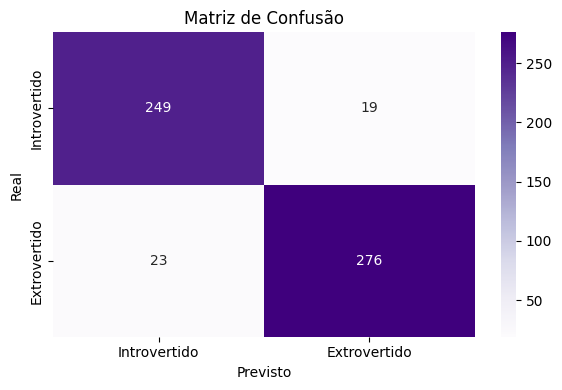

In [52]:
# mostrar matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_confusão, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Introvertido', 'Extrovertido'],
            yticklabels=['Introvertido', 'Extrovertido'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.tight_layout()
plt.show()

In [53]:
print(relatorio)

              precision    recall  f1-score   support

Introvertido       0.92      0.93      0.92       268
Extrovertido       0.94      0.92      0.93       299

    accuracy                           0.93       567
   macro avg       0.93      0.93      0.93       567
weighted avg       0.93      0.93      0.93       567



Optimization terminated successfully.
         Current function value: 0.337082
         Iterations 7


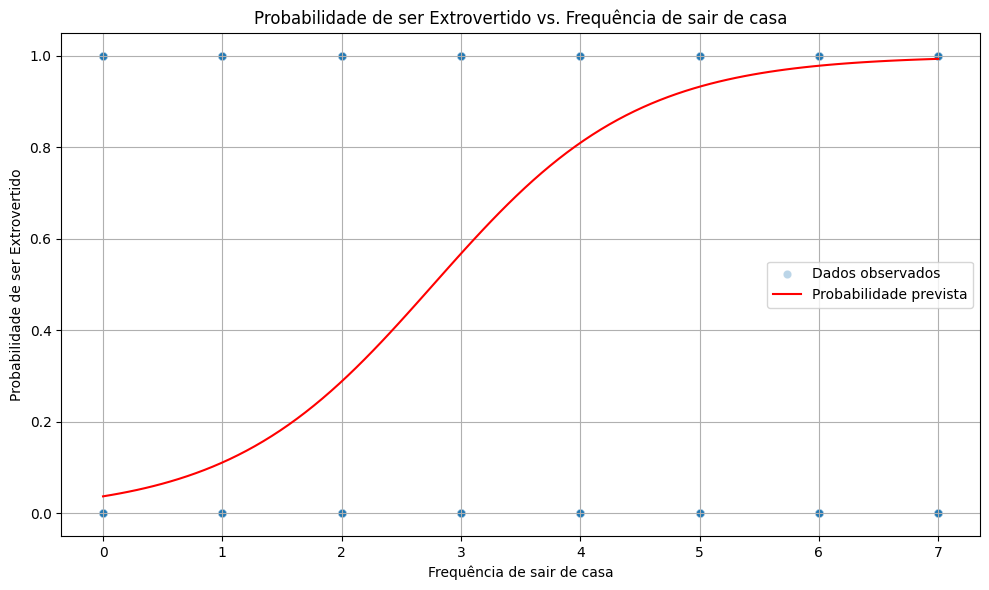

In [62]:
# Ajustar o modelo
X = sm.add_constant(df_clean['Frequência_de_sair_de_casa'])
y = df_clean['Personalidade_binária']
modelo = sm.Logit(y, X)
resultado = modelo.fit()

# Previsões de probabilidade
df_clean['Probabilidade_Extrovertido'] = resultado.predict(X)

# Gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Frequência_de_sair_de_casa',
    y='Personalidade_binária',
    data=df_clean,
    alpha=0.3,
    label='Dados observados'
)

# Linha da regressão logística
x_vals = np.linspace(df_clean['Frequência_de_sair_de_casa'].min(),
                     df_clean['Frequência_de_sair_de_casa'].max(), 100)
x_vals_const = sm.add_constant(x_vals)
y_vals = resultado.predict(x_vals_const)
plt.plot(x_vals, y_vals, color='red', label='Probabilidade prevista')

# Ajustes visuais
plt.title('Probabilidade de ser Extrovertido vs. Frequência de sair de casa')
plt.xlabel('Frequência de sair de casa')
plt.ylabel('Probabilidade de ser Extrovertido')
plt.ylim(-0.05, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
